# Feature Engenering

### Import des modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib
from scipy import stats

In [2]:
df = joblib.load("df.joblib")

df.info()
df = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to FONDKAPREMONT_MODE_ISNA
dtypes: category(1), float64(52), int64(55), object(16)
memory usage: 288.9+ MB


In [3]:
def safe_div(a, b): 
    return np.where(b==0, 0, a/b)

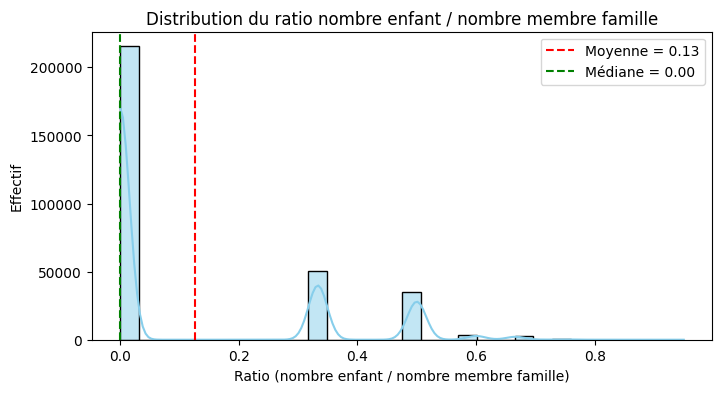

In [4]:

df['CHILDREN_RATIO'] =  safe_div(df['CNT_CHILDREN'], df['CNT_FAM_MEMBERS'])

plt.figure(figsize=(8,4))
sns.histplot(df['CHILDREN_RATIO'], bins=30, kde=True, color="skyblue")
plt.axvline(df['CHILDREN_RATIO'].mean(), color="red", linestyle="--", label=f"Moyenne = {df['CHILDREN_RATIO'].mean():.2f}")
plt.axvline(df['CHILDREN_RATIO'].median(), color="green", linestyle="--", label=f"Médiane = {df['CHILDREN_RATIO'].median():.2f}")
plt.title("Distribution du ratio nombre enfant / nombre membre famille")
plt.xlabel("Ratio (nombre enfant / nombre membre famille)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

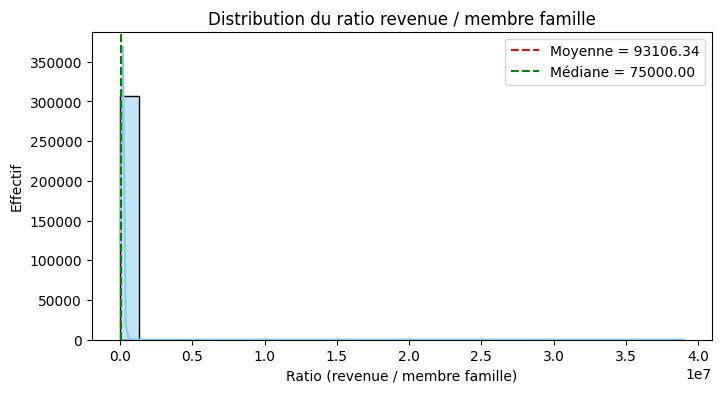

In [5]:
df['INCOME_PER_PERSON'] = safe_div(df['AMT_INCOME_TOTAL'], df['CNT_FAM_MEMBERS'])

plt.figure(figsize=(8,4))
sns.histplot(df['INCOME_PER_PERSON'], bins=30, kde=True, color="skyblue")
plt.axvline(df['INCOME_PER_PERSON'].mean(), color="red", linestyle="--", label=f"Moyenne = {df['INCOME_PER_PERSON'].mean():.2f}")
plt.axvline(df['INCOME_PER_PERSON'].median(), color="green", linestyle="--", label=f"Médiane = {df['INCOME_PER_PERSON'].median():.2f}")
plt.title("Distribution du ratio revenue / membre famille")
plt.xlabel("Ratio (revenue / membre famille)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

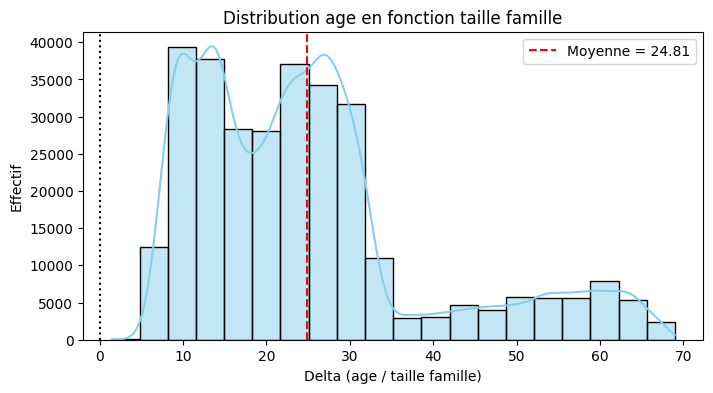

In [6]:
df['AGE_PER_MEMBER'] = safe_div(df['AGE'], df['CNT_FAM_MEMBERS'])
plt.figure(figsize=(8,4))
sns.histplot(df['AGE_PER_MEMBER'], bins=20, kde=True, color="skyblue")
plt.axvline(df['AGE_PER_MEMBER'].mean(), color="red", linestyle="--", label=f"Moyenne = {df['AGE_PER_MEMBER'].mean():.2f}")
plt.axvline(0, color="black", linestyle=":") 
plt.title("Distribution age en fonction taille famille")
plt.xlabel("Delta (age / taille famille)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

In [7]:
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']


In [8]:
joblib.dump(df, "df.joblib")

['df.joblib']